In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point
import osmnx as ox
import matplotlib.pyplot as plt

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [131]:
edges = aup.gdf_from_db('edges11','vialidades11')
nodes = aup.gdf_from_db('nodes11','vialidades11')

In [132]:
print(edges.shape)
edges.head(2)

(257561, 16)


,ID,TIPOVIA,TIPO,NUMERO,DERE_TRAN,ADMINISTRA,NUME_CARR,CONDICION,ORIGEN,CALI_REPR,CVEGEO,NOMVIAL,SENTIDO,LONGITUD,UNIDAD,geometry
0,1693032,CARRETERA,PAVIMENTADA,NINGUNO,LIBRE,ESTATAL,2,EN OPERACION,NUEVA,DEFINIDA,N/A,N/A,N/A,34.79,e14,"LINESTRING (-104.68350 19.19010, -104.68341 19..."
1,1693033,CARRETERA,PAVIMENTADA,NINGUNO,LIBRE,ESTATAL,2,EN OPERACION,NUEVA,DEFINIDA,N/A,N/A,N/A,15.29,e14,"LINESTRING (-104.68360 19.18984, -104.68360 19..."


<AxesSubplot:>

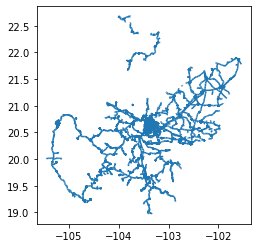

In [133]:
edges.plot()

In [134]:
print(nodes.shape)
nodes.head(2)

(176576, 22)


,ID,TIPOVIA,TIPO,NUMERO,DERE_TRAN,ADMINISTRA,NUME_CARR,CONDICION,ORIGEN,CALI_REPR,...,SENTIDO,LONGITUD,UNIDAD,vertex_pos,vertex_ind,vertex_par,vertex_p_1,distance,angle,geometry
0,1693032,CARRETERA,PAVIMENTADA,NINGUNO,LIBRE,ESTATAL,2,EN OPERACION,NUEVA,DEFINIDA,...,N/A,34.79,e14,0.0,0.0,0.0,0.0,0.000000,71.757615,POINT (-104.68350 19.19010)
1,1693032,CARRETERA,PAVIMENTADA,NINGUNO,LIBRE,ESTATAL,2,EN OPERACION,NUEVA,DEFINIDA,...,N/A,34.79,e14,-1.0,3.0,0.0,3.0,34.793688,71.748603,POINT (-104.68318 19.19018)


<AxesSubplot:>

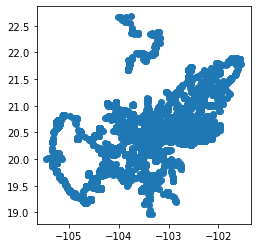

In [135]:
nodes.plot()

In [136]:
nodes = nodes.to_crs("EPSG:6372")

In [137]:
edges = edges.to_crs("EPSG:6372")

In [138]:
nodes['obscd_idx'] = ((nodes.geometry.x).astype(int)).astype(str)+((nodes.geometry.y).astype(int)).astype(str)
nodes.head(5)

,ID,TIPOVIA,TIPO,NUMERO,DERE_TRAN,ADMINISTRA,NUME_CARR,CONDICION,ORIGEN,CALI_REPR,...,LONGITUD,UNIDAD,vertex_pos,vertex_ind,vertex_par,vertex_p_1,distance,angle,geometry,obscd_idx
0,1693032,CARRETERA,PAVIMENTADA,NINGUNO,LIBRE,ESTATAL,2,EN OPERACION,NUEVA,DEFINIDA,...,34.79,e14,0.0,0.0,0.0,0.0,0.000000,71.757615,POINT (2218525.473 801921.350),2218525801921
1,1693032,CARRETERA,PAVIMENTADA,NINGUNO,LIBRE,ESTATAL,2,EN OPERACION,NUEVA,DEFINIDA,...,34.79,e14,-1.0,3.0,0.0,3.0,34.793688,71.748603,POINT (2218559.008 801930.170),2218559801930
2,1693033,CARRETERA,PAVIMENTADA,NINGUNO,LIBRE,ESTATAL,2,EN OPERACION,NUEVA,DEFINIDA,...,15.29,e14,0.0,0.0,0.0,0.0,0.000000,1.072151,POINT (2218514.339 801892.772),2218514801892
3,1693033,CARRETERA,PAVIMENTADA,NINGUNO,LIBRE,ESTATAL,2,EN OPERACION,NUEVA,DEFINIDA,...,15.29,e14,-1.0,2.0,0.0,2.0,15.295731,22.721472,POINT (2218515.098 801907.965),2218515801907
4,1693034,CARRETERA,PAVIMENTADA,NINGUNO,LIBRE,ESTATAL,2,EN OPERACION,NUEVA,DEFINIDA,...,10.30,e14,0.0,0.0,0.0,0.0,0.000000,335.661829,POINT (2218518.745 801880.705),2218518801880


In [139]:
str(int(list(edges.iloc[0].geometry.coords)[0][0]))+str(int(list(edges.iloc[0].geometry.coords)[0][1]))

'2218525801921'

In [140]:
str(int(list(edges.iloc[0].geometry.coords)[-1][0]))+str(int(list(edges.iloc[0].geometry.coords)[-1][1]))

'2218559801930'

In [146]:
edges_tmp = edges.copy()
edges_tmp['u'] = np.nan
edges_tmp['v'] = np.nan
edges_tmp.u.astype(str)
edges_tmp.v.astype(str)

for index, row in edges_tmp.iterrows():
    
    edges_tmp.at[index,'u'] = str(int(list(row.geometry.coords)[0][0]))+str(int(list(row.geometry.coords)[0][1]))
    edges_tmp.at[index,'v'] = str(int(list(row.geometry.coords)[-1][0]))+str(int(list(row.geometry.coords)[-1][1]))
    
    #print(index)


In [147]:
print(edges_tmp.shape)
edges_tmp.head(2)

(257561, 18)


,ID,TIPOVIA,TIPO,NUMERO,DERE_TRAN,ADMINISTRA,NUME_CARR,CONDICION,ORIGEN,CALI_REPR,CVEGEO,NOMVIAL,SENTIDO,LONGITUD,UNIDAD,geometry,u,v
0,1693032,CARRETERA,PAVIMENTADA,NINGUNO,LIBRE,ESTATAL,2,EN OPERACION,NUEVA,DEFINIDA,N/A,N/A,N/A,34.79,e14,"LINESTRING (2218525.473 801921.350, 2218535.50...",2.218526e+12,2.218560e+12
1,1693033,CARRETERA,PAVIMENTADA,NINGUNO,LIBRE,ESTATAL,2,EN OPERACION,NUEVA,DEFINIDA,N/A,N/A,N/A,15.29,e14,"LINESTRING (2218514.339 801892.772, 2218514.60...",2.218515e+12,2.218516e+12


In [148]:
edges_tmp['u'] = (edges_tmp.u.astype(int)).astype(str)
edges_tmp['v'] = (edges_tmp.v.astype(int)).astype(str)

In [149]:
edges_tmp['key'] = 0

In [150]:
print(edges_tmp.shape)
edges_tmp.head(2)

(257561, 19)


,ID,TIPOVIA,TIPO,NUMERO,DERE_TRAN,ADMINISTRA,NUME_CARR,CONDICION,ORIGEN,CALI_REPR,CVEGEO,NOMVIAL,SENTIDO,LONGITUD,UNIDAD,geometry,u,v,key
0,1693032,CARRETERA,PAVIMENTADA,NINGUNO,LIBRE,ESTATAL,2,EN OPERACION,NUEVA,DEFINIDA,N/A,N/A,N/A,34.79,e14,"LINESTRING (2218525.473 801921.350, 2218535.50...",2218525801921,2218559801930,0
1,1693033,CARRETERA,PAVIMENTADA,NINGUNO,LIBRE,ESTATAL,2,EN OPERACION,NUEVA,DEFINIDA,N/A,N/A,N/A,15.29,e14,"LINESTRING (2218514.339 801892.772, 2218514.60...",2218514801892,2218515801907,0


In [58]:
nodes_tmp = nodes.copy()
nodes_tmp['osmid'] = nodes_tmp['obscd_idx']
nodes_tmp = nodes_tmp.to_crs("EPSG:4326")
nodes_tmp['x'] = nodes_tmp.geometry.x
nodes_tmp['y'] = nodes_tmp.geometry.y
edges_tmp = edges_tmp.to_crs("EPSG:4326")
edges_tmp.set_index(['u','v','key'], inplace=True)
nodes_tmp.set_index('osmid', inplace=True)

G = ox.graph_from_gdfs(nodes_tmp, edges_tmp)

KeyboardInterrupt: 

In [151]:
amg = {"Guadalajara":{"mpos":["14039", "14044", "14051", 
                              "14070", "14097", "14098", "14101", 
                              "14120", "14124"],"edo":["14"]}}
df_amg = pd.DataFrame(amg)
df_amg.head(1)

,Guadalajara
edo,[14]


In [152]:
mun_gdf = gpd.GeoDataFrame()

for m in df_amg.loc['mpos'][0]:
    query = f"SELECT * FROM marco.mpos_2020 WHERE \"CVEGEO\" LIKE \'{m}\'"
    mun_gdf = mun_gdf.append(aup.gdf_from_query(query, geometry_col='geometry'))
    
mun_gdf = mun_gdf.to_crs("EPSG:4326")
print(mun_gdf.shape)
mun_gdf.head(1)

(9, 5)


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,14039,14,039,Guadalajara,"POLYGON ((-103.31164 20.75098, -103.31014 20.7..."


In [153]:
nodes_amg = gpd.clip(nodes_tmp, mun_gdf)

In [154]:
import random

idx = random.choices(list(nodes_amg.index.unique()),k=1)[0]

In [155]:
start_point = nodes_amg.loc[nodes_amg.index==idx].reset_index()

<AxesSubplot:>

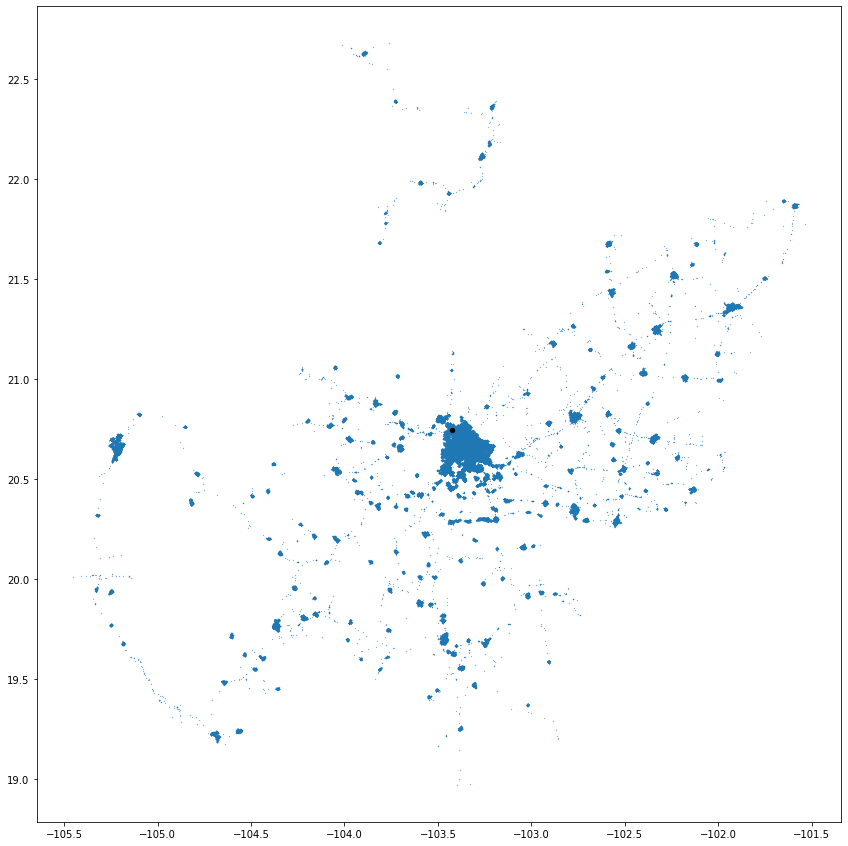

In [156]:
fig, ax = plt.subplots(figsize=(15,15))

#edges_plt = ox.graph_to_gdfs(G, nodes=False)

start_point.plot(ax=ax, color='black', markersize=20, zorder=2)
nodes_tmp.plot(ax=ax, markersize=0.05, zorder=-1)
#edges_plt[(edges_plt['highway']=='primary') | (edges_plt['highway']=='secondary')].plot(ax=axes, color='#e8e9eb',linewidth=0.5, zorder=0)
#route_gdf.plot(ax=ax, color='#86d4da', alpha=0.3, zorder=1)

In [158]:
edges_tmp = edges_tmp.reset_index()

edges_tmp['u'] = edges_tmp.u.astype(int)
edges_tmp['v'] = edges_tmp.v.astype(int)
edges_tmp = edges_tmp.set_index(['u','v','key'])
edges_tmp['length'] = edges_tmp.to_crs("EPSG:6372").length

nodes_tmp = nodes_tmp.reset_index()
nodes_tmp['osmid'] = nodes_tmp.osmid.astype(int)
nodes_tmp = nodes_tmp.set_index('osmid')


nodes_dist = aup.calculate_distance_nearest_poi(start_point, nodes_tmp, 
                edges_tmp, 'rndm', 'osmid', wght='length')

In [159]:
print(nodes_dist.shape)
nodes_dist.head(2)

(171937, 26)


,ID,TIPOVIA,TIPO,NUMERO,DERE_TRAN,ADMINISTRA,NUME_CARR,CONDICION,ORIGEN,CALI_REPR,...,vertex_ind,vertex_par,vertex_p_1,distance,angle,geometry,obscd_idx,x,y,dist_rndm
osmid,,,,,,,,,,,,,,,,,,,,,
2503198950386,1693046,CARRETERA,PAVIMENTADA,37,LIBRE,FEDERAL,2,EN OPERACION,TOPO50K,DEFINIDA,...,0.0,0.0,0.0,0.000000,15.146444,POINT (-101.96920 20.55967),2503198950386,-101.969199,20.559666,188866.263094
2503210950440,1693046,CARRETERA,PAVIMENTADA,37,LIBRE,FEDERAL,2,EN OPERACION,TOPO50K,DEFINIDA,...,2.0,0.0,2.0,56.038409,10.562610,POINT (-101.96908 20.56016),2503210950440,-101.969084,20.560162,188810.224685


0.0

In [160]:
nodes_amg = nodes_amg.set_crs("EPSG:4326")
nodes_amg = nodes_amg.geometry
## Extracts coordinates from polygon as DataFrame
coord_val = nodes_amg.bounds
## Gets coordinates for bounding box
n = coord_val.maxy.max()
s = coord_val.miny.min()
e = coord_val.maxx.max()
w = coord_val.minx.min()

<AxesSubplot:>

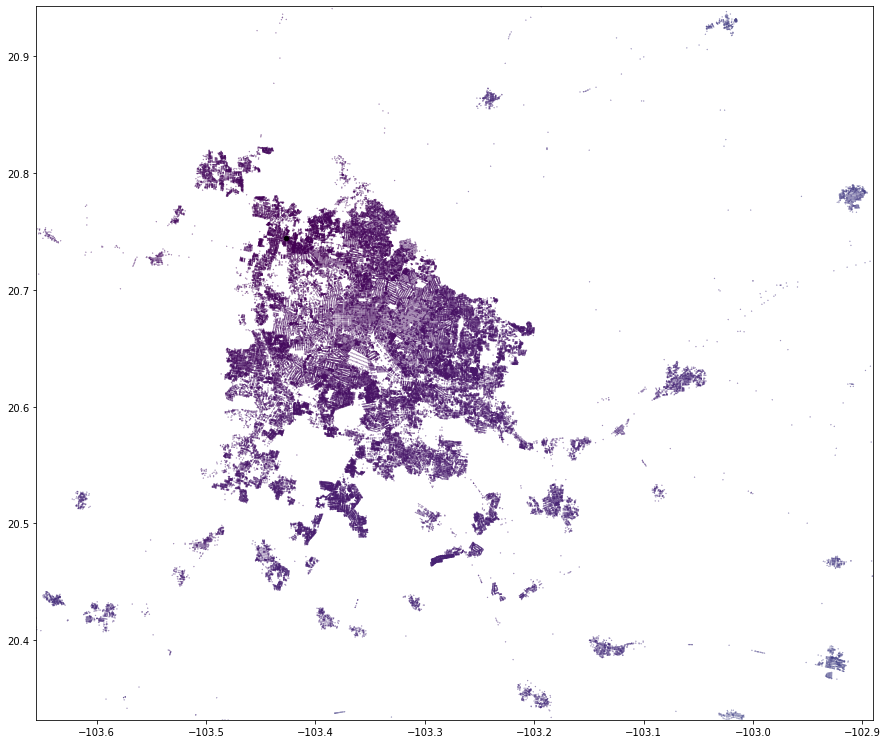

In [163]:
fig, ax = plt.subplots(figsize=(15,15))


xmin = w - 0.002
xmax = e + 0.002
ymin = s - 0.002
ymax = n + 0.002
#edges_plt = ox.graph_to_gdfs(G, nodes=False)

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

start_point.plot(ax=ax, color='black', markersize=20, zorder=2)
nodes_dist.plot('dist_rndm', ax=ax, markersize=0.05, zorder=-1)

In [167]:
nodes_dist.to_file(f'/home/edgar/SIG/ObsCds/Proyectos/Idx_2010/Medio_Urbano/nodes_dist.geojson', driver='GeoJSON')